### 2.9) Auto data set

<img src="../images/2.9.jpg">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.

%matplotlib inline

In [2]:
data_loc = "../data/Auto.csv"
auto_df = pd.read_csv(data_loc)

auto_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320


In [3]:
### data info

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


It seems suspicious that 'horsepower' is of 'object' type. Let's have a closer look.

In [4]:
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
auto_df = auto_df[auto_df.horsepower != '?'].copy()

auto_df['horsepower']=pd.to_numeric(auto_df['horsepower'])

In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


#### a) Quantitative and qualitative predictors

In [7]:
quantitative = auto_df.select_dtypes(include=['number']).columns
quantitative

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [8]:
qualitative = auto_df.select_dtypes(exclude=['number']).columns
qualitative

Index(['name'], dtype='object')

#### b) Range of each quantitative predictor

In [9]:
desc = auto_df.describe()
desc.loc["range"] = desc.loc["max"] - desc.loc["min"]
desc

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,"2,225.25",13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,"2,803.50",15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,"3,614.75",17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00
range,37.60,5.00,387.00,184.00,"3,527.00",16.80,12.00,2.00


#### c) Mean and standard deviation

In [10]:
desc

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,"2,225.25",13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,"2,803.50",15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,"3,614.75",17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00
range,37.60,5.00,387.00,184.00,"3,527.00",16.80,12.00,2.00


#### d) Mean and standard deviation, removing observations

In [11]:
auto_df_new = auto_df.drop(auto_df.index[10:85])

desc_new = auto_df_new.describe()
desc_new.loc["range"] = desc_new.loc["max"] - desc_new.loc["min"]
desc_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.00,317.00,317.00,317.00,317.00,317.00,317.00,317.00
mean,24.37,5.38,187.88,101.00,"2,938.85",15.70,77.12,1.60
std,7.87,1.66,100.17,36.00,811.64,2.72,3.13,0.82
min,11.00,3.00,68.00,46.00,"1,649.00",8.50,70.00,1.00
25%,18.00,4.00,101.00,75.00,"2,215.00",14.00,75.00,1.00
50%,23.90,4.00,146.00,90.00,"2,795.00",15.50,77.00,1.00
75%,30.50,6.00,250.00,115.00,"3,520.00",17.30,80.00,2.00
max,46.60,8.00,455.00,230.00,"4,997.00",24.80,82.00,3.00
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


#### e) Visualizing relationships between variables

- Scatterplots
- Box plots
- Histograms

C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


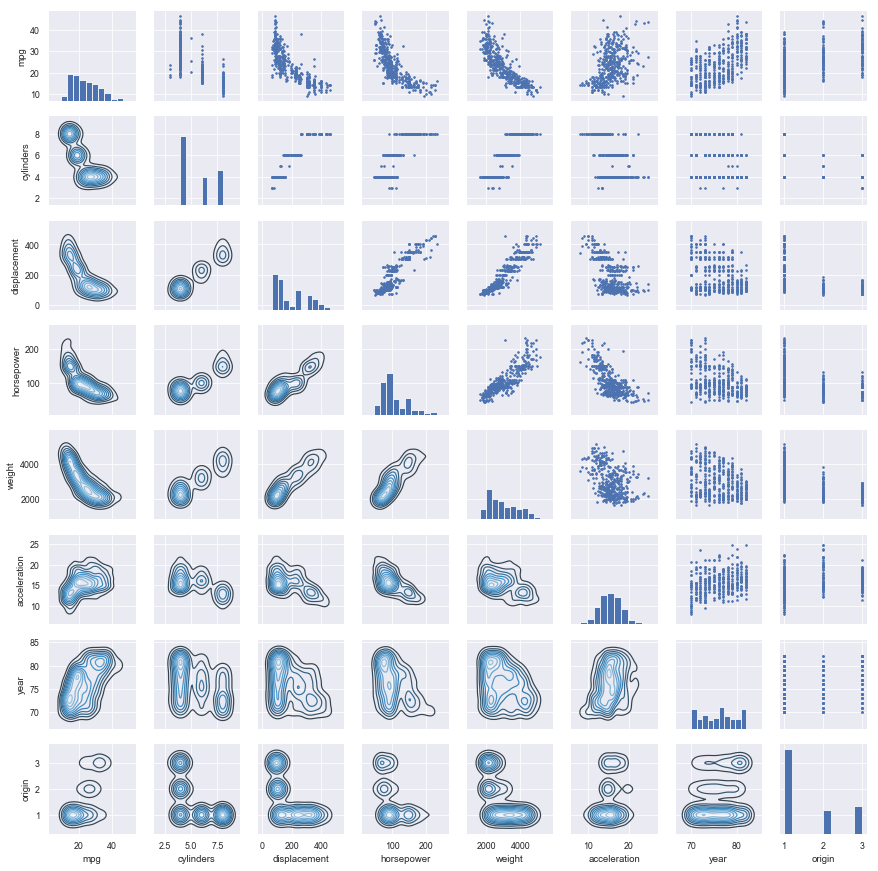

In [13]:
sns.set()
sns.set_context("paper")

sc_plot = sns.PairGrid(auto_df, height = 2)
sc_plot.map_upper(plt.scatter, s = 3)
sc_plot.map_diag(plt.hist)
sc_plot.map_lower(sns.kdeplot, cmap = "Blues_d")
sc_plot.fig.set_size_inches(12, 12)

plt.show()

- The histogram for 'acceleration' resembles a normal distribution.
- 'displacement' and 'weight' have a strong linear relationship.
- 'mpg' has a non-linear relationship with 'weight', 'horsepower' and 'displacement'.


#### f) Predicting mpg


- we could use weight, horsepower and displacement. As seen in the scatterplots, these variables seem to have a non-linear relationship with mpg. 